In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from IPython.display import clear_output

from PIL import Image
%matplotlib inline

pokeapi = "http://pokeapi.co/api/v2/"


In [105]:
pokemons = pd.read_csv("Pokemon.csv")
pokemons = pokemons.replace("CharizardMega Charizard X", "Charizard Mega X")
pokemons = pokemons.replace("CharizardMega Charizard Y", "Charizard Mega Y")
pokemons = pokemons.replace("MewtwoMega Mewtwo X", "Mewtwo Mega X")
pokemons = pokemons.replace("MewtwoMega Mewtwo Y", "Mewtwo Mega Y")
pokemons[pokemons['Name'].str.contains("Mega")]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,Charizard Mega X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Charizard Mega Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,115,KangaskhanMega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False


In [151]:
def image_path(poke_id):
    if poke_id % 100 == 0:
        print("Loading (" + str(poke_id) +"/800)")
    elif poke_id == 800:
        print("Loading complete!")
    if "Meganium" in pokemons.loc[poke_id]['Name']:
        return 'sprites/154.png'
    elif "Mega X" in pokemons.loc[poke_id]['Name']:
        return 'sprites/' + str(pokemons['#'][poke_id]) + '-mega-x.png'
    elif "Mega Y" in pokemons.loc[poke_id]['Name']:
        return 'sprites/' + str(pokemons['#'][poke_id]) + '-mega-y.png'
    elif "Mega" in pokemons.loc[poke_id]['Name']:
        return 'sprites/' + str(pokemons['#'][poke_id]) + '-mega.png'
    else:
        return 'sprites/' + str(pokemons['#'][poke_id]) + '.png'

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

def statsplot(x, y, title, xlabel, ylabel):
    fig, ax = plt.subplots()
    for loop in range(0, 800):
        imscatter(x[loop], y[loop], image_path(loop), zoom=1, ax=ax)
        ax.scatter(x[loop], y[loop])
    fig_size = [15, 12]
    plt.rcParams["figure.figsize"] = fig_size
    print ("Figure size:", fig_size)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    plt.show()

Loading (0/800)
Loading (100/800)
Loading (200/800)
Loading (300/800)
Loading (400/800)
Loading (500/800)
Loading (600/800)
Loading (700/800)
Figure size: [15, 12]


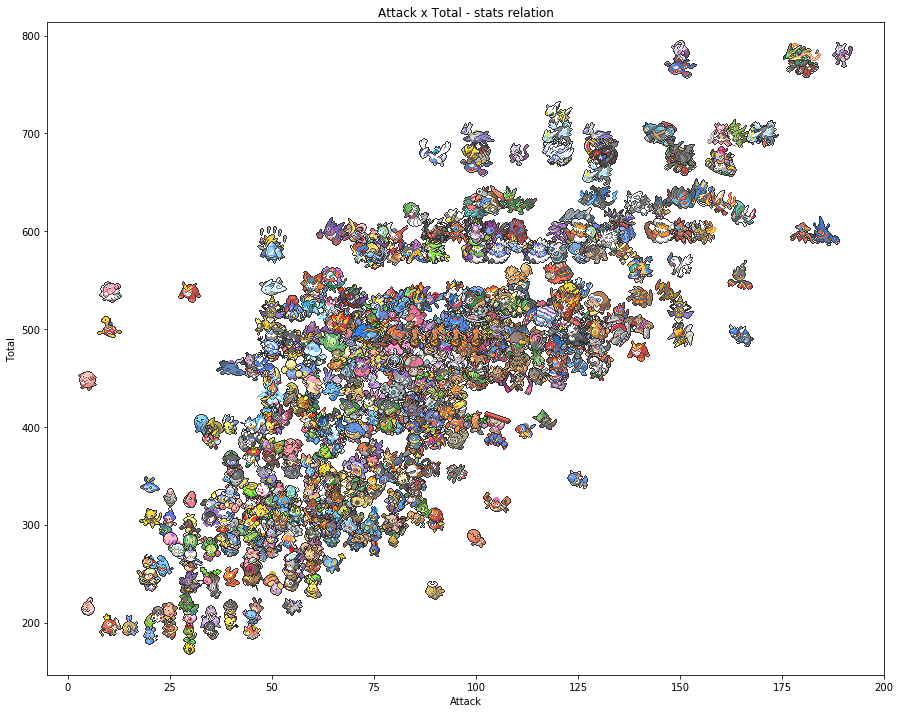

In [150]:
x = pokemons['Attack']
y = pokemons['Total']
statsplot(x, y, 'Attack x Total - stats relation', 'Attack', 'Total')

Loading (0/800)
Loading (100/800)
Loading (200/800)
Loading (300/800)
Loading (400/800)
Loading (500/800)
Loading (600/800)
Loading (700/800)
Figure size: [15, 12]


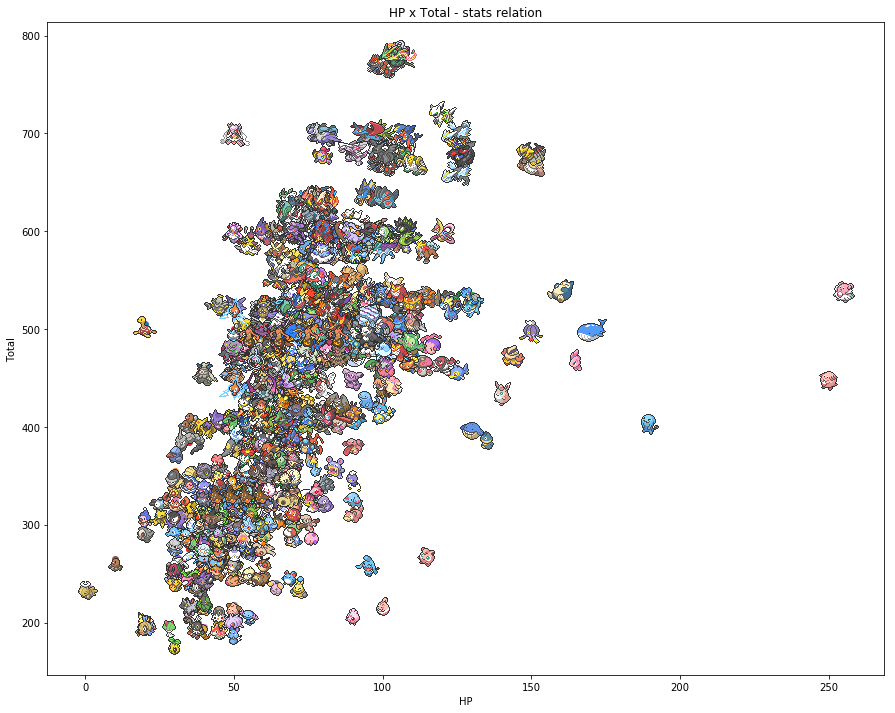

In [149]:
x = pokemons['HP']
y = pokemons['Total']
statsplot(x, y, 'HP x Total - stats relation', 'HP', 'Total')